## Tutorial: Decision Tree Classifier



### Problem



As a demonstration of supervised machine learning, let's predict if
the patients have a medical condition or not based on recorded patient
attributes, using a well-known medical dataset, the Pima Indians
diabetes mellitus database.



### Algorithm



Decision tree = white-box, supervised machine learning.

Example: decision tree to prevent a heart attack based on age, weight,
smoking.

![img](./img/decisiontree.png)



### Dataset



Pima Indian Diabetes dataset [from Kaggle.com](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data): This dataset is
originally from the National Institute of Diabetes and Digestive and
Kidney Diseases. The objective of the dataset is to diagnostically
predict whether or not a patient has diabetes, based on certain
diagnostic measurements included in the dataset. Several constraints
were placed on the selection of these instances from a larger
database. In particular, all patients here are females at least 21
years old of Pima Indian heritage.

Features:

1.  Pregnancies: Number of times pregnant
2.  Glucose Plasma: glucose concentration a 2 hours in an oral glucose
    tolerance test
3.  BloodPressure: Diastolic blood pressure (mm Hg)
4.  SkinThickness: Triceps skinfold thickness (mm)
5.  Insulin: 2-Hour serum insulin level (mu U/ml)
6.  BMI: Body mass index (weight in kg/(height in m)²)
7.  DiabetesPedigreeFunction: Diabetes pedigree function
8.  Age: Age (years)
9.  Outcome Class: variable (0 or 1) 268 of 768 are 1, the others are 0



### Import libraries



In [1]:
# Load libraries
import pandas as pd # data frame manipulation
import numpy as np  # array manipulation
import matplotlib.pyplot as plt  # plotting
import seaborn as sns # plotting

### Load the data



The Kaggle data do not have a a names and CSV file. In the [names file](https://github.com/jbrownlee/Datasets/blob/master/pima-indians-diabetes.names),
you get relevant information about the data including headers, and in
the [CSV file](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv), you get the (headerless) data.



In [1]:
# set column names
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin',
             'bmi', 'pedigree', 'age', 'label']
# load dataset from URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
pima = pd.read_csv(url, header=None, names=col_names)

# print top of dataset
print(pima.head(n=4))

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0

### Data cleaning



There are some severe issues with the dataset found at Kaggle ([see
here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/discussion/395213)): many values are nonsensically 0 instead of missing (`NaN`).



In [1]:
columns_to_replace = ['glucose','bp','skin','insulin','bmi']
pima[columns_to_replace] = pima[columns_to_replace].replace(0,np.nan)

# print top of dataset
print(pima.head(n=4))

>>>    pregnant  glucose    bp  skin  insulin   bmi  pedigree  age  label
0         6    148.0  72.0  35.0      NaN  33.6     0.627   50      1
1         1     85.0  66.0  29.0      NaN  26.6     0.351   31      0
2         8    183.0  64.0   NaN      NaN  23.3     0.672   32      1
3         1     89.0  66.0  23.0     94.0  28.1     0.167   21      0

### Visualize the missing data



Import `missingno` for EDA of the missing data.



In [1]:
import missingno as msno

A matrix visualization of the dataset provides a quick visual insight
into the completeness of the data. Each row represents an entry in the
dataset, and white lines indicate missing values.



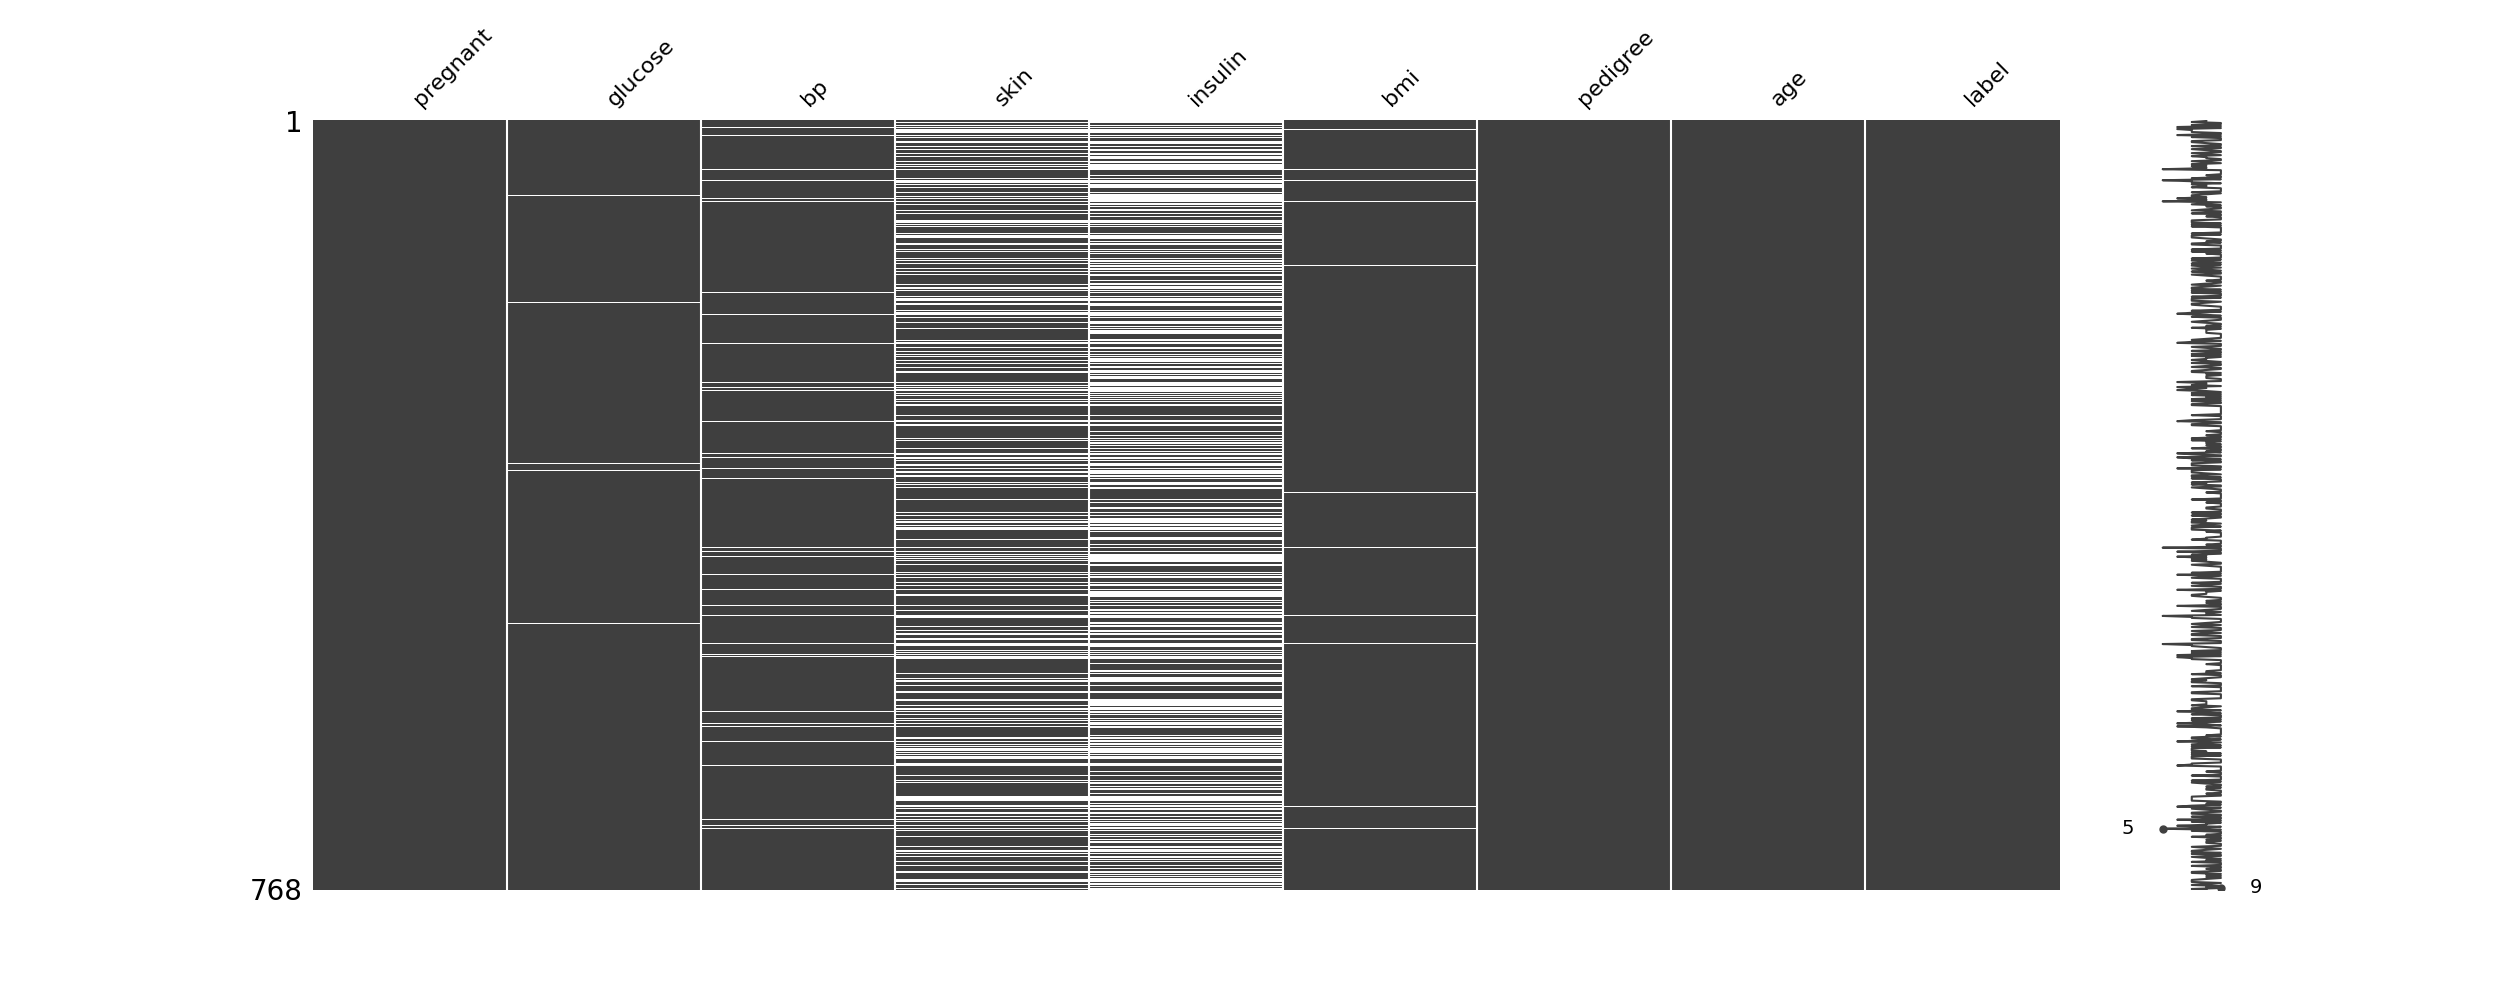

In [1]:
msno.matrix(pima)
plt.savefig("img/pima.msno.matrix.png")

A bar chart is provided on the right side of the matrix visualization
which gives a quantitative measure of the completeness of the data.



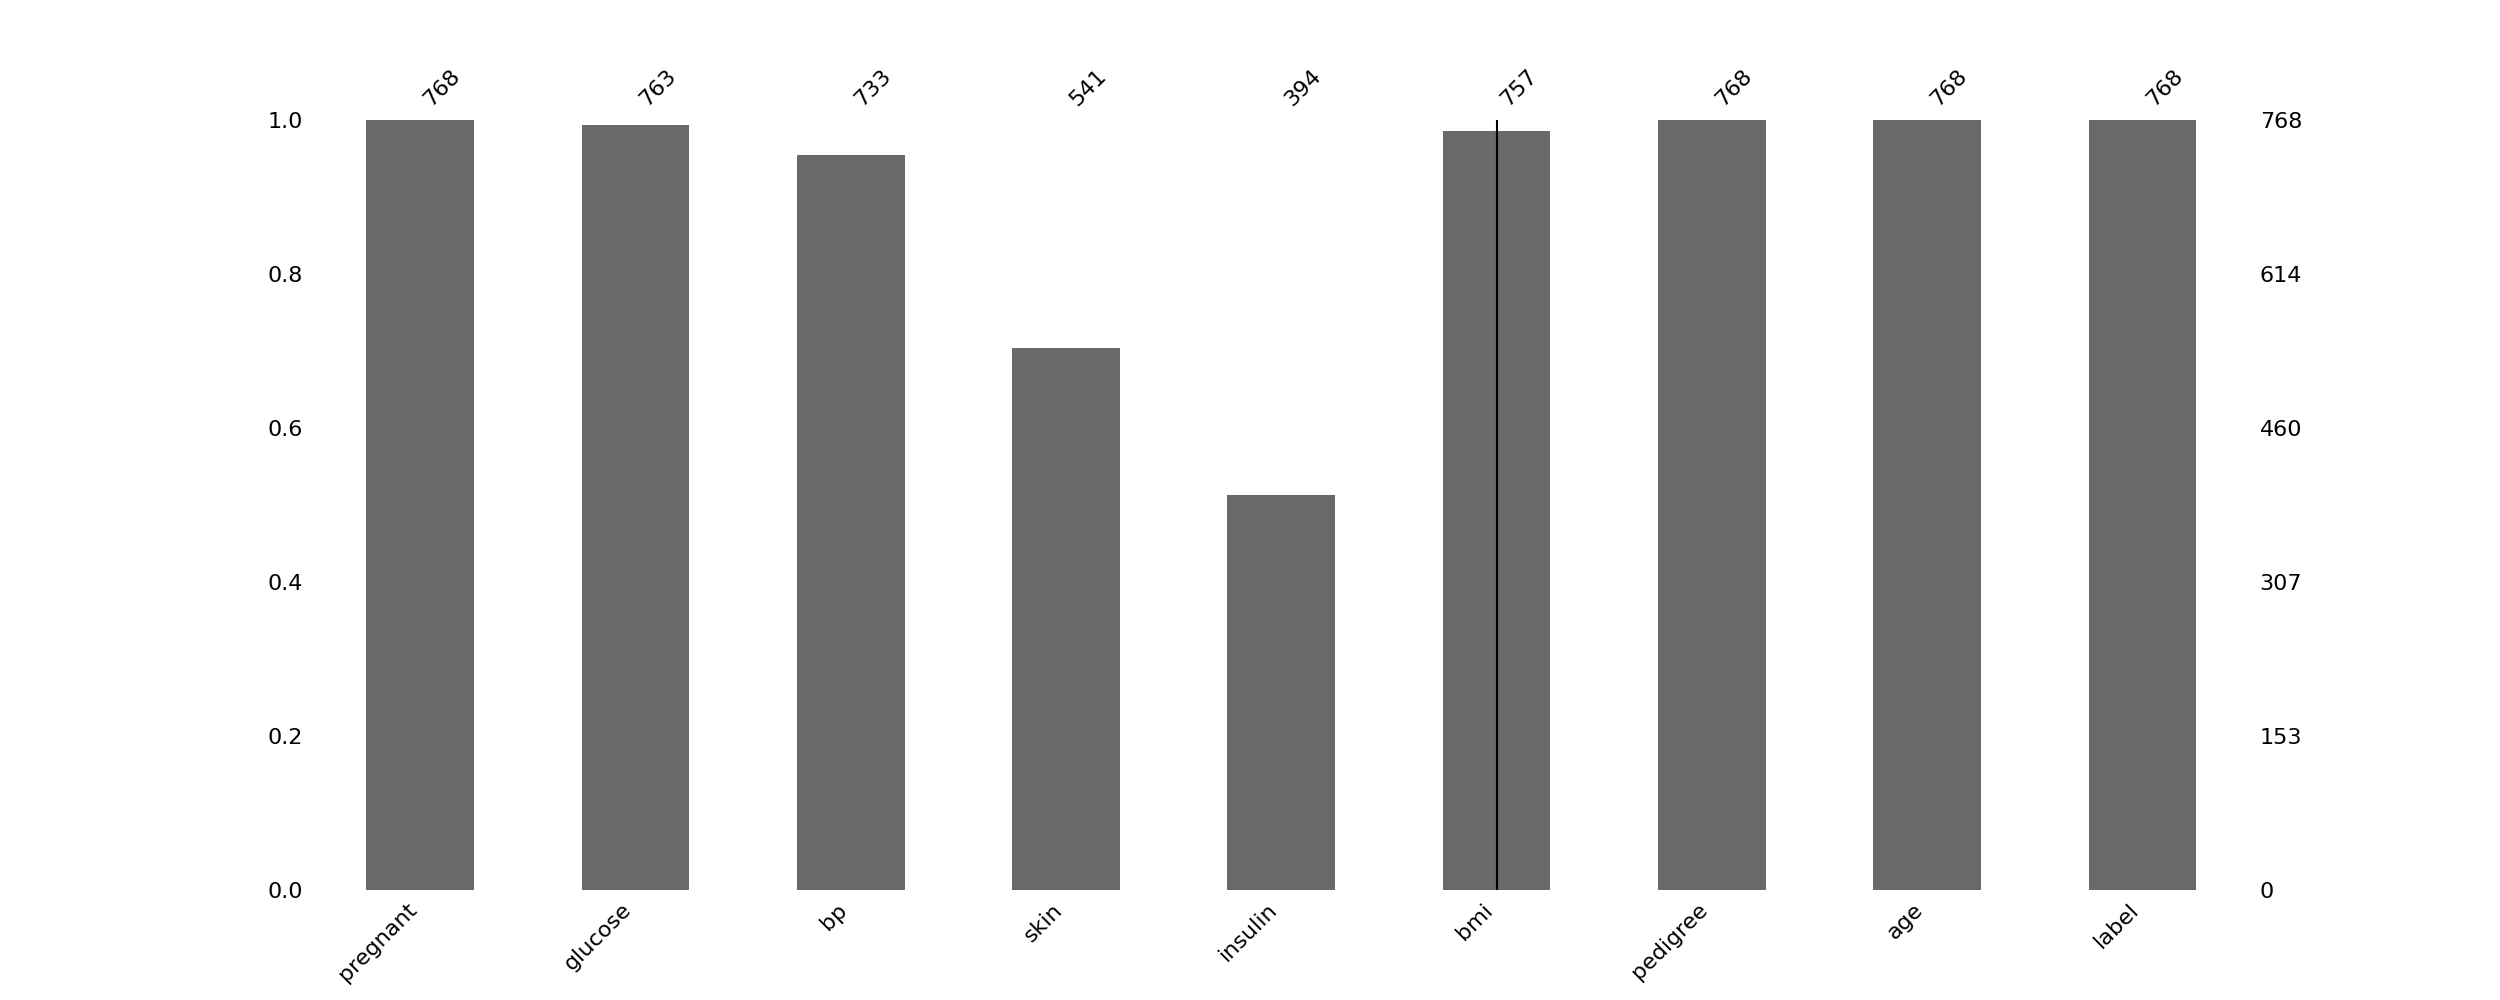

In [1]:
msno.bar(pima)
plt.savefig("img/pima.msno.bar.png")

A heatmap of the correlation of missingness between different
columns. This is useful to discover patterns in missing data - for
example, if one value being missing is correlated with another value
being missing.



In [1]:
msno.heatmap(pima)
plt.savefig("img/pima.msno.heatmap.png")

A dendrogram is a tree diagram of missingness correlations. This can
be used to cluster columns together which have similar missingness
patterns.



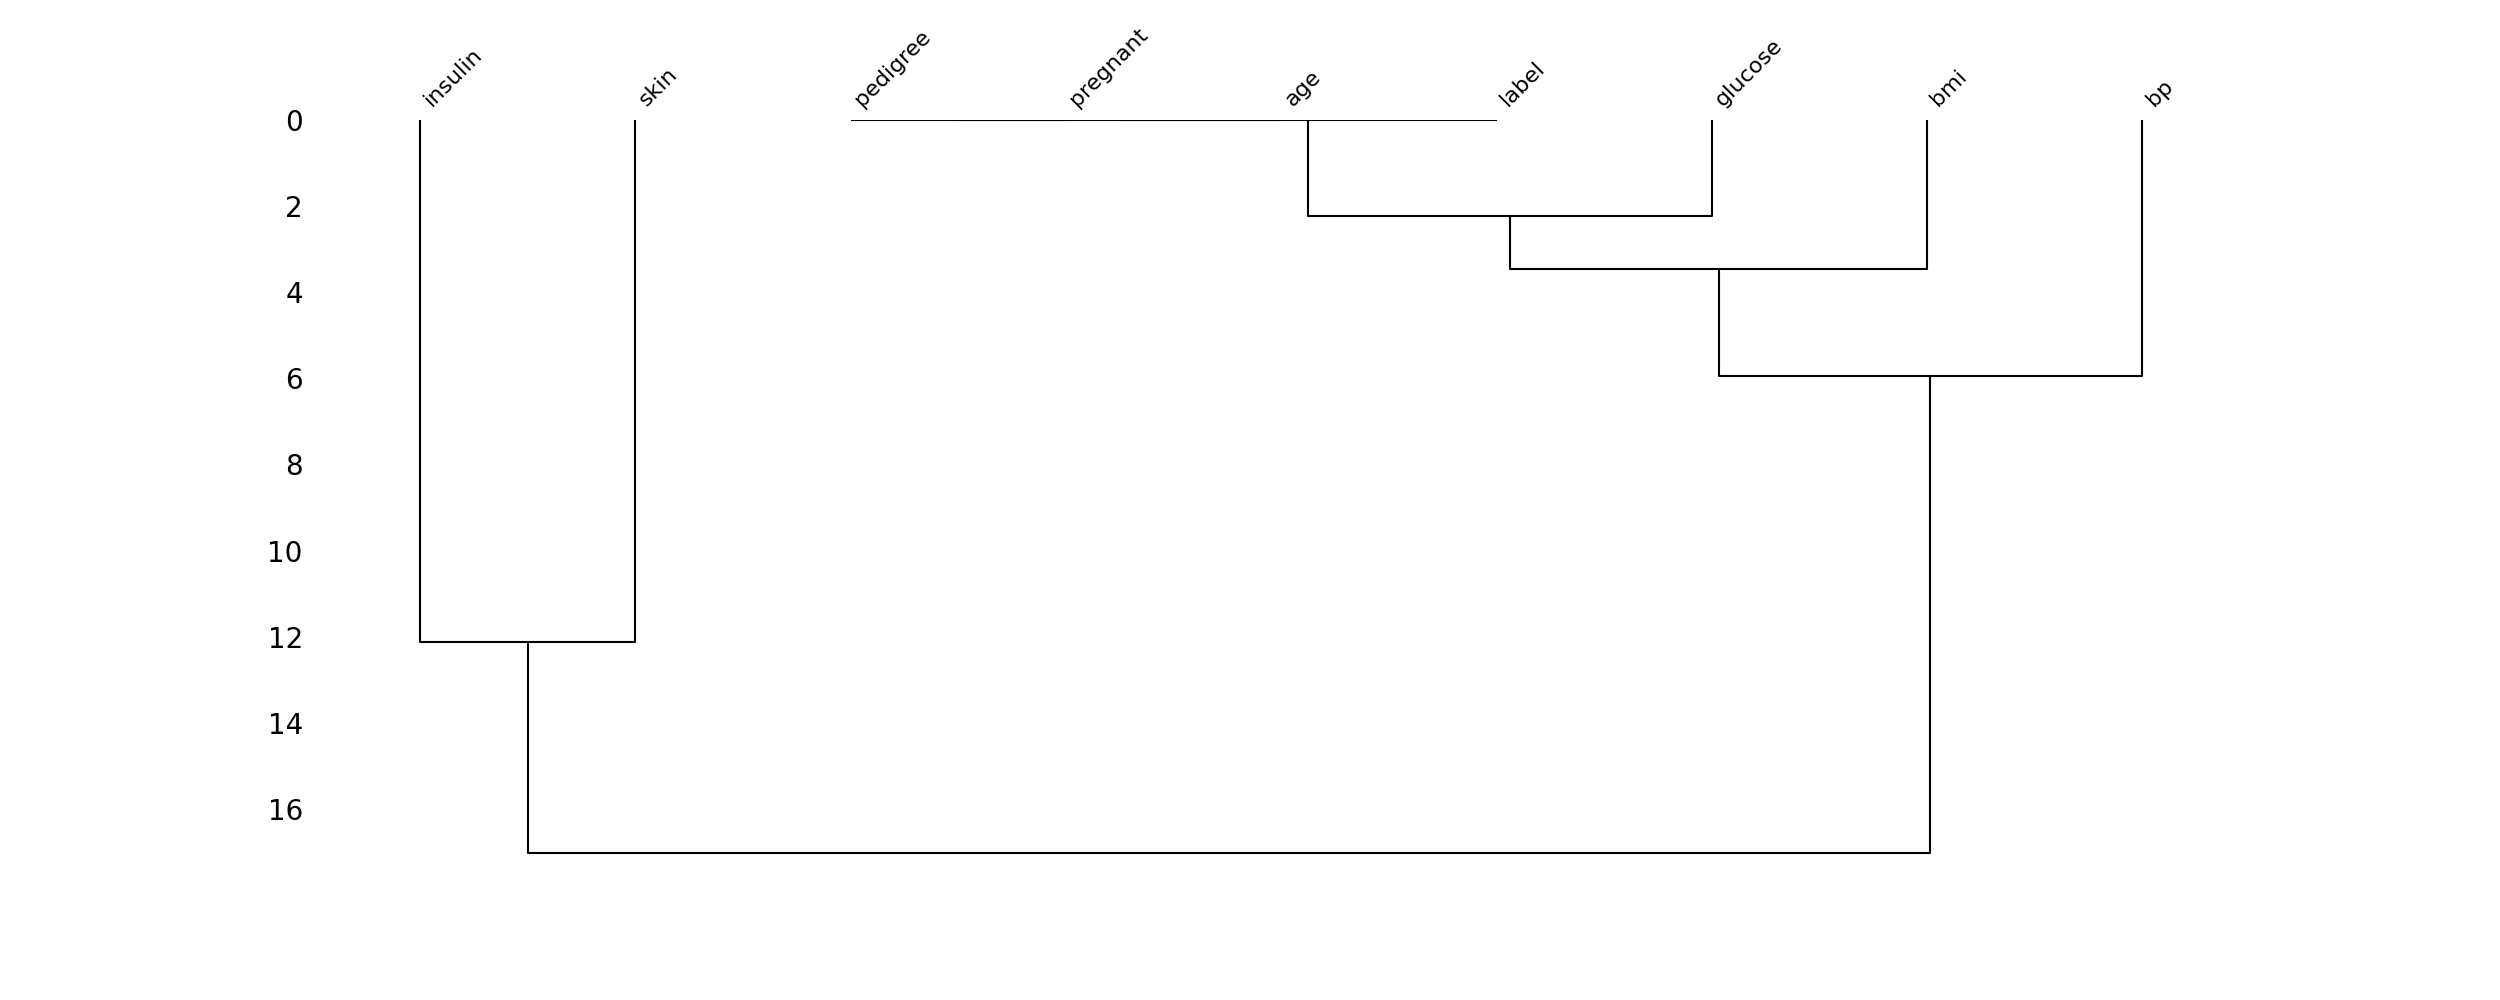

In [1]:
msno.dendrogram(pima)
plt.savefig("img/pima.msno.dendrogram.png")

From all of these, we conclude that `insulin` levels has the greatest
number of missing values, and that `skin` thickness and `insulin` levels
are highly correlated (though not so much that one feature could be
dropped).



### Visualize attribute correlations



We use a *heatmap* to visualize the correlations between different
attributes:



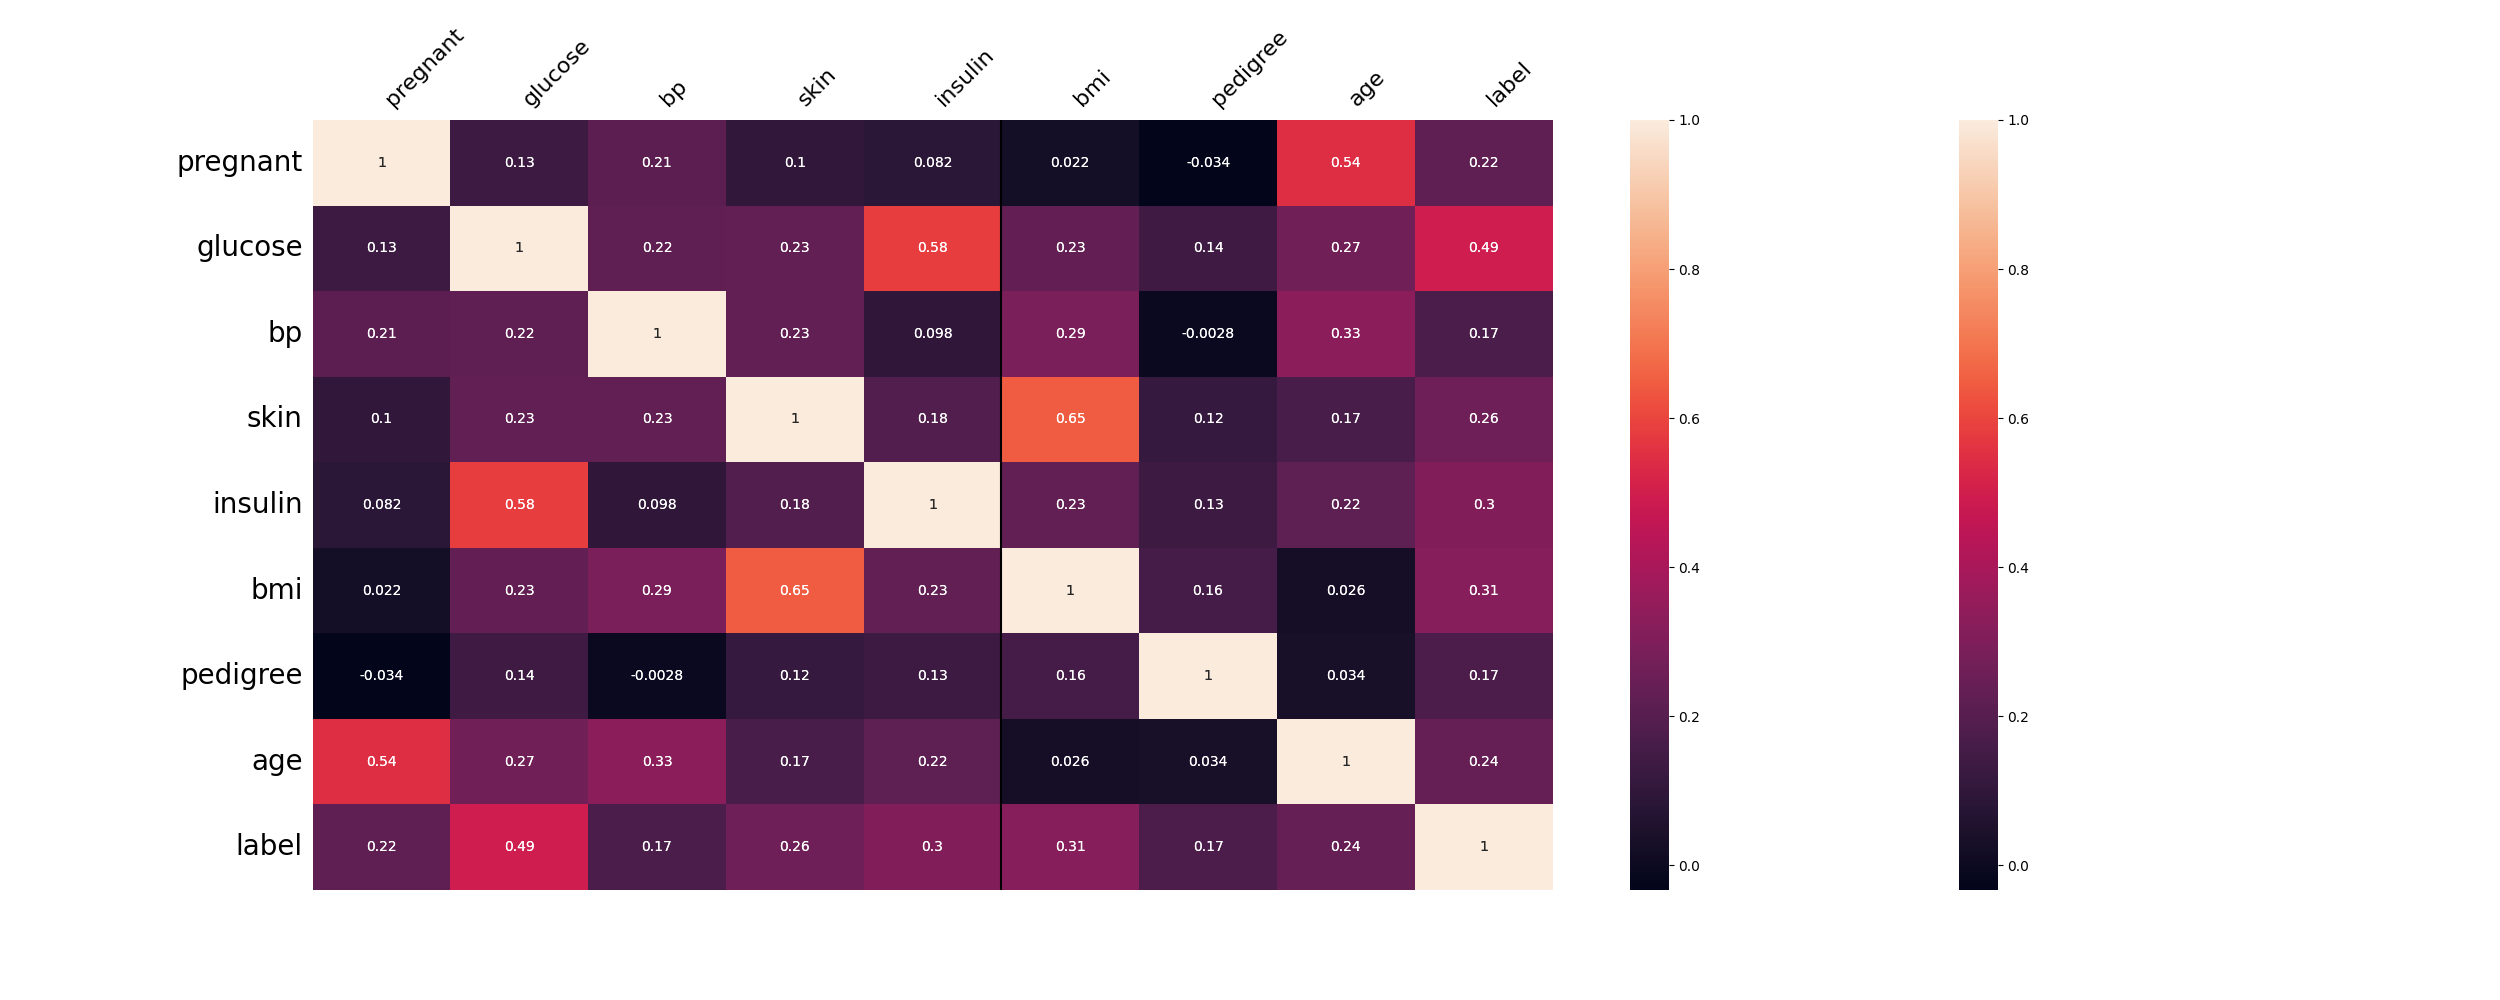

In [1]:
sns.heatmap(pima.corr(), annot=True)
plt.savefig("img/pima.sns.heatmap.png")

### Load machine learning libraries



Training the model includes three steps:

1.  Selecting the dependent (target) variable, and the independent
    (feature) variables.
2.  Splitting the data into a (randomized) training and a testing data
    set.
3.  Building the decision tree model.
4.  Evaluating the model using the testing data.

Load machine learning libraries.



In [1]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

### Selecting features and target



In [1]:
# Split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age',
                'glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable
print(X.head(2))
print(y.head(2))

pregnant  insulin   bmi  age  glucose    bp  pedigree
0         6      NaN  33.6   50    148.0  72.0     0.627
1         1      NaN  26.6   31     85.0  66.0     0.351
0    1
1    0
Name: label, dtype: int64

### Splitting data



Split the dataset using `train_test_split`. The function accepts three
parameters: a feature array, test size and train size. By default, the
records are shuffled.



In [1]:
# Split dataset into 70% training set and 30% test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)
# check length of datasets
print(len(X_train['bp']) + len(X_test['bp']))

### Building the model



Create a decision tree model:



In [1]:
# Create empty Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer from training dataset
clf = clf.fit(X_train,y_train)
print(type(clf))

# Predict the response for test dataset
y_pred = clf.predict(X_test)
print(type(y_pred))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
<class 'numpy.ndarray'>

### Evaluating the model



Model accuracy translates into the percentage of correct predictions -
computed from the average difference between the known test data
labels `y_test` and the predicted test data labels `y_pred`.



In [1]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7359307359307359

This means that on average close to 3/4 of the diabetes can be
predicted on the basis of the independent features alone.

You can improve this value by "fine-tuning" parameters in the decision
tree algorithm, and by "pruning" the tree ([see video](https://youtu.be/LDRbO9a6XPU?si=Hxh_2SVULh3kVczr) and [notebook](https://app.datacamp.com/workspace/w/e697d528-b73e-49ac-b3e5-1fb7b0eea0f9/edit)).

A 100% accuracy would be indicative of overfitting: the model knows
the training data too well, failing to generalize on unseen data,
which is the central purpose of the model.



### Visualizing the model



To display the tree in a notebook, install `graphviz` and `pydotplus`:

    !pip install graphviz
    !pip install pydotplus
    !pip install six

The `export.graphviz` function converts the decision tree classifier
into a dot file, and `pydotplus` converts the dot file to an image file.



In [1]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('img/diabetes.png')
Image(graph.create_png())

### Optimizing the model



### References



Decision Tree Classification in Python Tutorial. By Avinash
Naviani. [URL: datacamp.com](https://app.datacamp.com/learn/tutorials/decision-tree-classification-python).

Let's Write a Decision Tree Classifier from Scratch - Machine Learning
Recipes #8. By Google for Developers. [URL: youtube.com](https://youtu.be/LDRbO9a6XPU?si=Hxh_2SVULh3kVczr).

Pima Indians Diabetes Prediction using Decision Tree in Google
Colab. By Sara karim. [URL: medium.com](https://medium.com/edviconedu/pima-indians-diabetes-prediction-using-decision-tree-in-google-colab-419b443a4525).

